In [287]:
%matplotlib inline

from solpy import pv
import json
from math import *

import matplotlib.pyplot as plt

In [265]:
jsonstring = """
{"system_name":"System Name",
    "zipcode":"17601",
    "tilt":30,
    "azimuth":180,
    "phase":1,
    "voltage":240,
    "array":[
        {"inverter":"SMA America: SB6000US 240V",
        "panel":"Mage Solar : USA Powertec Plus 250-6 MNCS",
        "series":14,
        "parallel":2}
        ]
    }"""

plant = pv.json_system(json.loads(jsonstring))
print plant.model()

Total output: 8456.1


In [266]:
plant.model()

Total output: 8456.1

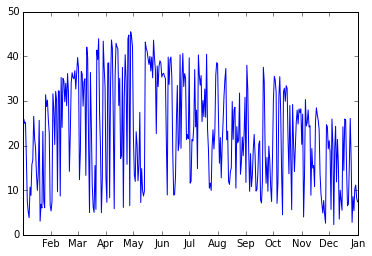

In [267]:
plant.model().chart();

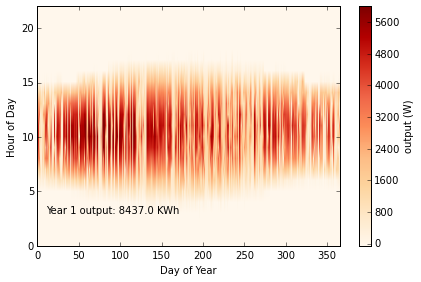

In [116]:
f=plant.model().plot();

In [102]:
results=plant.forecast_output(source='noaa',hours=72)

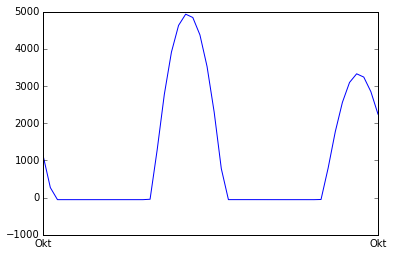

In [103]:
results.chart();

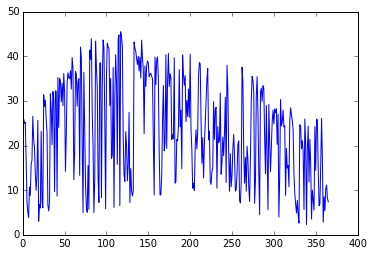

In [108]:
plt.plot(plant.model().dump()[1])

In [89]:
import ephem
import pandas as pd
import numpy as np

In [6]:
u = ephem.Uranus()

In [7]:
u.compute('1781/3/13')

In [8]:
print('%s %s %s' % (u.ra, u.dec, u.mag))

5:35:45.28 23:32:54.1 5.6


In [250]:
gatech = ephem.Observer()
gatech.lon, gatech.lat = '13.39733', '53.775867'


In [251]:
gatech.date = '2016/5/30 18:22:56'   # 12:22:56 EDT
sun, moon = ephem.Sun(), ephem.Moon()
sun.compute(gatech)
#moon.compute(gatech)
print("%s %s" % (sun.alt, sun.az))
#print("%s %s" % (moon.alt, moon.az))

6:46:50.9 298:26:40.3


In [252]:
import datetime
datetime.datetime.now().time()

datetime.time(20, 41, 59, 142781)

In [253]:
def sunpos(date):
    gatech.date= date
    sun.compute(gatech)
    return sun.alt,sun.az

In [254]:
sunpos('2016/5/30 18:22:56')

(0.11834724992513657, 5.208839416503906)

In [255]:
print("%s %s" % sunpos('2016/5/30 03:00:00'))

1:20:49.4 52:45:04.0


In [256]:
datetime.datetime.now().time()

datetime.time(20, 41, 59, 907908)

In [394]:
rng = pd.date_range('1/7/2011', periods=24*365, freq='H')

In [470]:
panel_tilt=30*np.pi/180  #30° Kippung 
panel_az=180*np.pi/180   #Ausrichtung nach Süden
p_peak=1000 # [W]


In [529]:
def sunposrange(date):
    alt=np.array([])
    az=np.array([])  
    P_beam_array=np.array([]) 
    for x in date:
        gatech.date= x
        sun.compute(gatech)
        #print x, sun.alt,sun.az
        alt=np.append(alt,np.max([0,sun.alt]))
        az=np.append(az,sun.az) 
        P_beam=p_peak*(cos(sun.alt)*cos(sun.az-panel_az)*sin(panel_tilt)+sin(sun.alt)*cos(panel_tilt))
        if (sun.alt<0 or P_beam<0 or abs(sun.az-panel_az)>90*np.pi/180):
            P_beam=0
        P_beam_array=np.append(P_beam_array,P_beam)     
    plt.show()
    return alt,az,P_beam_array

In [530]:
alt,az,P=sunposrange(rng)

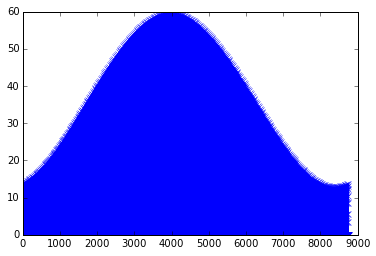

In [531]:
plt.plot(alt*180/np.pi,'x-')

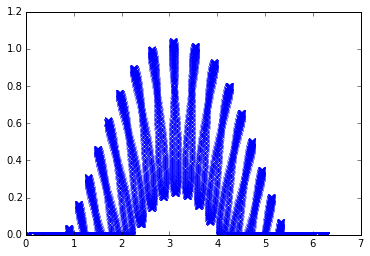

In [532]:
plt.plot(az,alt,"x")

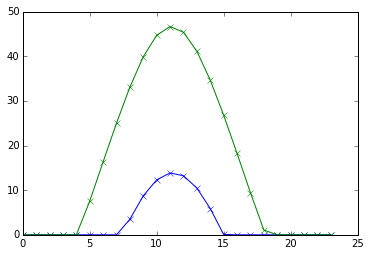

In [533]:
plt.plot(alt[:24]*180/np.pi,'x-')
plt.plot(alt[2400:2424]*180/np.pi,'x-')

In [534]:
#http://solpy.readthedocs.org/en/latest/theory.html#beam

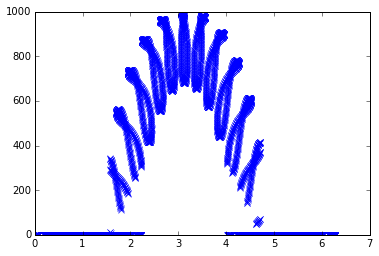

In [535]:
plt.plot(az,P,"x")

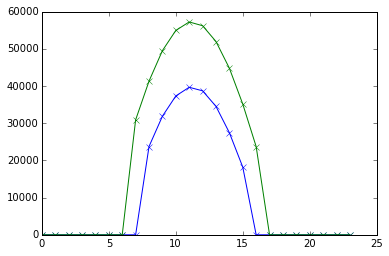

In [536]:
plt.plot(P[:24]*180/np.pi,'x-')
plt.plot(P[366*12:366*12+24]*180/np.pi,'x-')

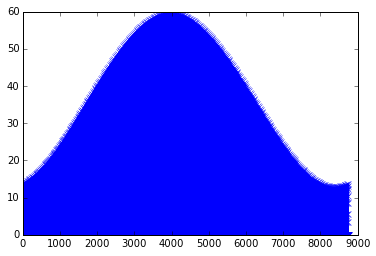

In [537]:
plt.plot(alt*180/np.pi,'x-')

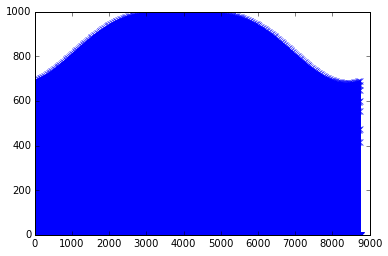

In [538]:
plt.plot(P,'x-')

In [539]:
np.sum(P)

2350183.7803614968

In [540]:
p_day=pd.rolling_sum(pd.Series(P),window=24)

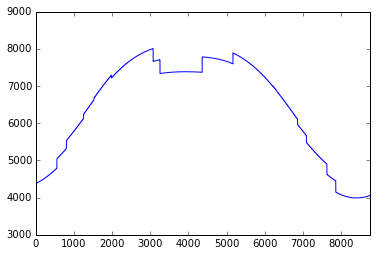

In [541]:
p_day.plot()

In [542]:
cos(30*np.pi/180)*sin(60*np.pi/180)+sin(30*np.pi/180)*cos(60*np.pi/180)

1.0

In [557]:
P_df=pd.DataFrame({'P':P},index=rng)

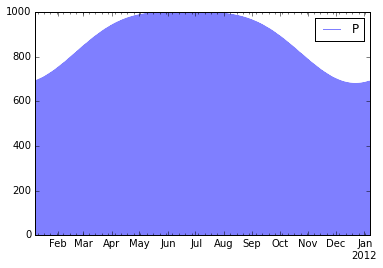

In [560]:
P_df.plot(alpha=.5);

In [561]:
import statsmodels.api as sm

In [581]:
decompfreq = 24*60/60

In [582]:
decompfreq

24

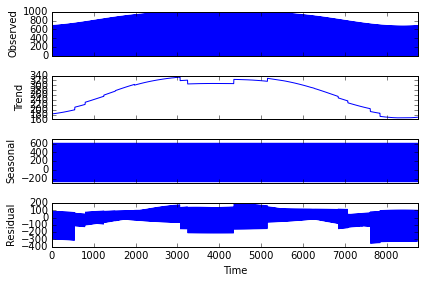

In [621]:
res = sm.tsa.seasonal_decompose(P,freq=24, model='additive')
resplot = res.plot()

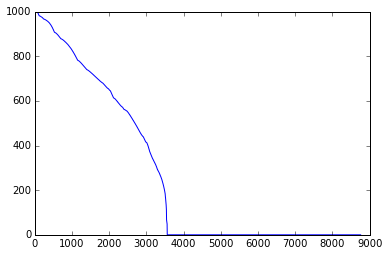

In [635]:
plt.plot(np.sort(P)[::-1]);
#Jahresstunden

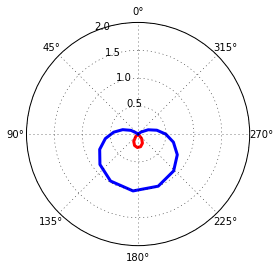

In [659]:
ax = plt.subplot(111, projection='polar')
ax.plot(az[:24], alt[:24], color='r', linewidth=3)
ax.plot(az[364*12:364*12+24], alt[364*12:364*12+24], color='b', linewidth=3)
ax.set_theta_zero_location("N")
ax.set_rmax(2.0)
ax.grid(True)

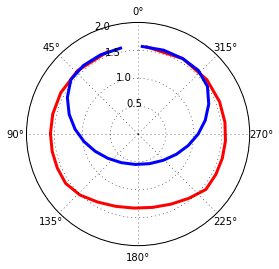

In [660]:
ax = plt.subplot(111, projection='polar')
ax.plot(az[:24], np.pi/2-alt[:24], color='r', linewidth=3)
ax.plot(az[364*12:364*12+24], np.pi/2-alt[364*12:364*12+24], color='b', linewidth=3)
ax.set_theta_zero_location("N")
ax.set_rmax(2.0)
ax.grid(True)

In [661]:
az[alt[364*12:364*12+24]>0]

array([ 1.34020948,  1.5635705 ,  1.76847804,  1.96743369,  2.16940546,
        2.38075876,  2.60515404,  2.84273744,  3.08949137,  3.33802247,
        3.58023691,  3.81047821,  4.02716112,  4.23258495,  4.43204689,
        4.63337851,  4.84742022])

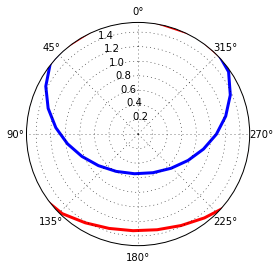

In [670]:
ax = plt.subplot(111, projection='polar')
ax.plot(az[:24], np.pi/2-alt[:24], color='r', linewidth=3)
ax.plot(az[364*12:364*12+24], np.pi/2-alt[364*12:364*12+24], color='b', linewidth=3)
ax.set_theta_zero_location("N")
ax.set_rmax(np.pi/2.05)
ax.grid(True)

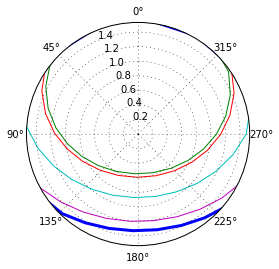

In [672]:
ax = plt.subplot(111, projection='polar')
ax.plot(az[:24], np.pi/2-alt[:24],  linewidth=3)
ax.plot(az[364*12:364*12+24], np.pi/2-alt[364*12:364*12+24], linewidth=1)
ax.plot(az[264*12:264*12+24], np.pi/2-alt[264*12:264*12+24], linewidth=1)
ax.plot(az[164*12:164*12+24], np.pi/2-alt[164*12:164*12+24], linewidth=1)
ax.plot(az[64*12:64*12+24], np.pi/2-alt[64*12:64*12+24], linewidth=1)
ax.set_theta_zero_location("N")
ax.set_rmax(np.pi/2.05)
ax.grid(True)